Import packages:

In [14]:
import os
import scipy.io
import numpy
import scipy.stats as ss
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import torch
from torch.utils.data.sampler import SubsetRandomSampler
from deep_signature.training import DeepSignatureDataset
from IPython.display import display, HTML

Global settings:

In [ ]:
dataset_dir_path = './dataset2'
train_results_dir_path = f"./train_results/{datetime.now().strftime('%Y-%m-%d-%H-%M-%S')}"
epochs = 100
batch_size = 256
validation_split = .2
shuffle_dataset = True
random_seed = 42
learning_rate = 5e-4

Train model:

Load loss stats:

Load loss stats:

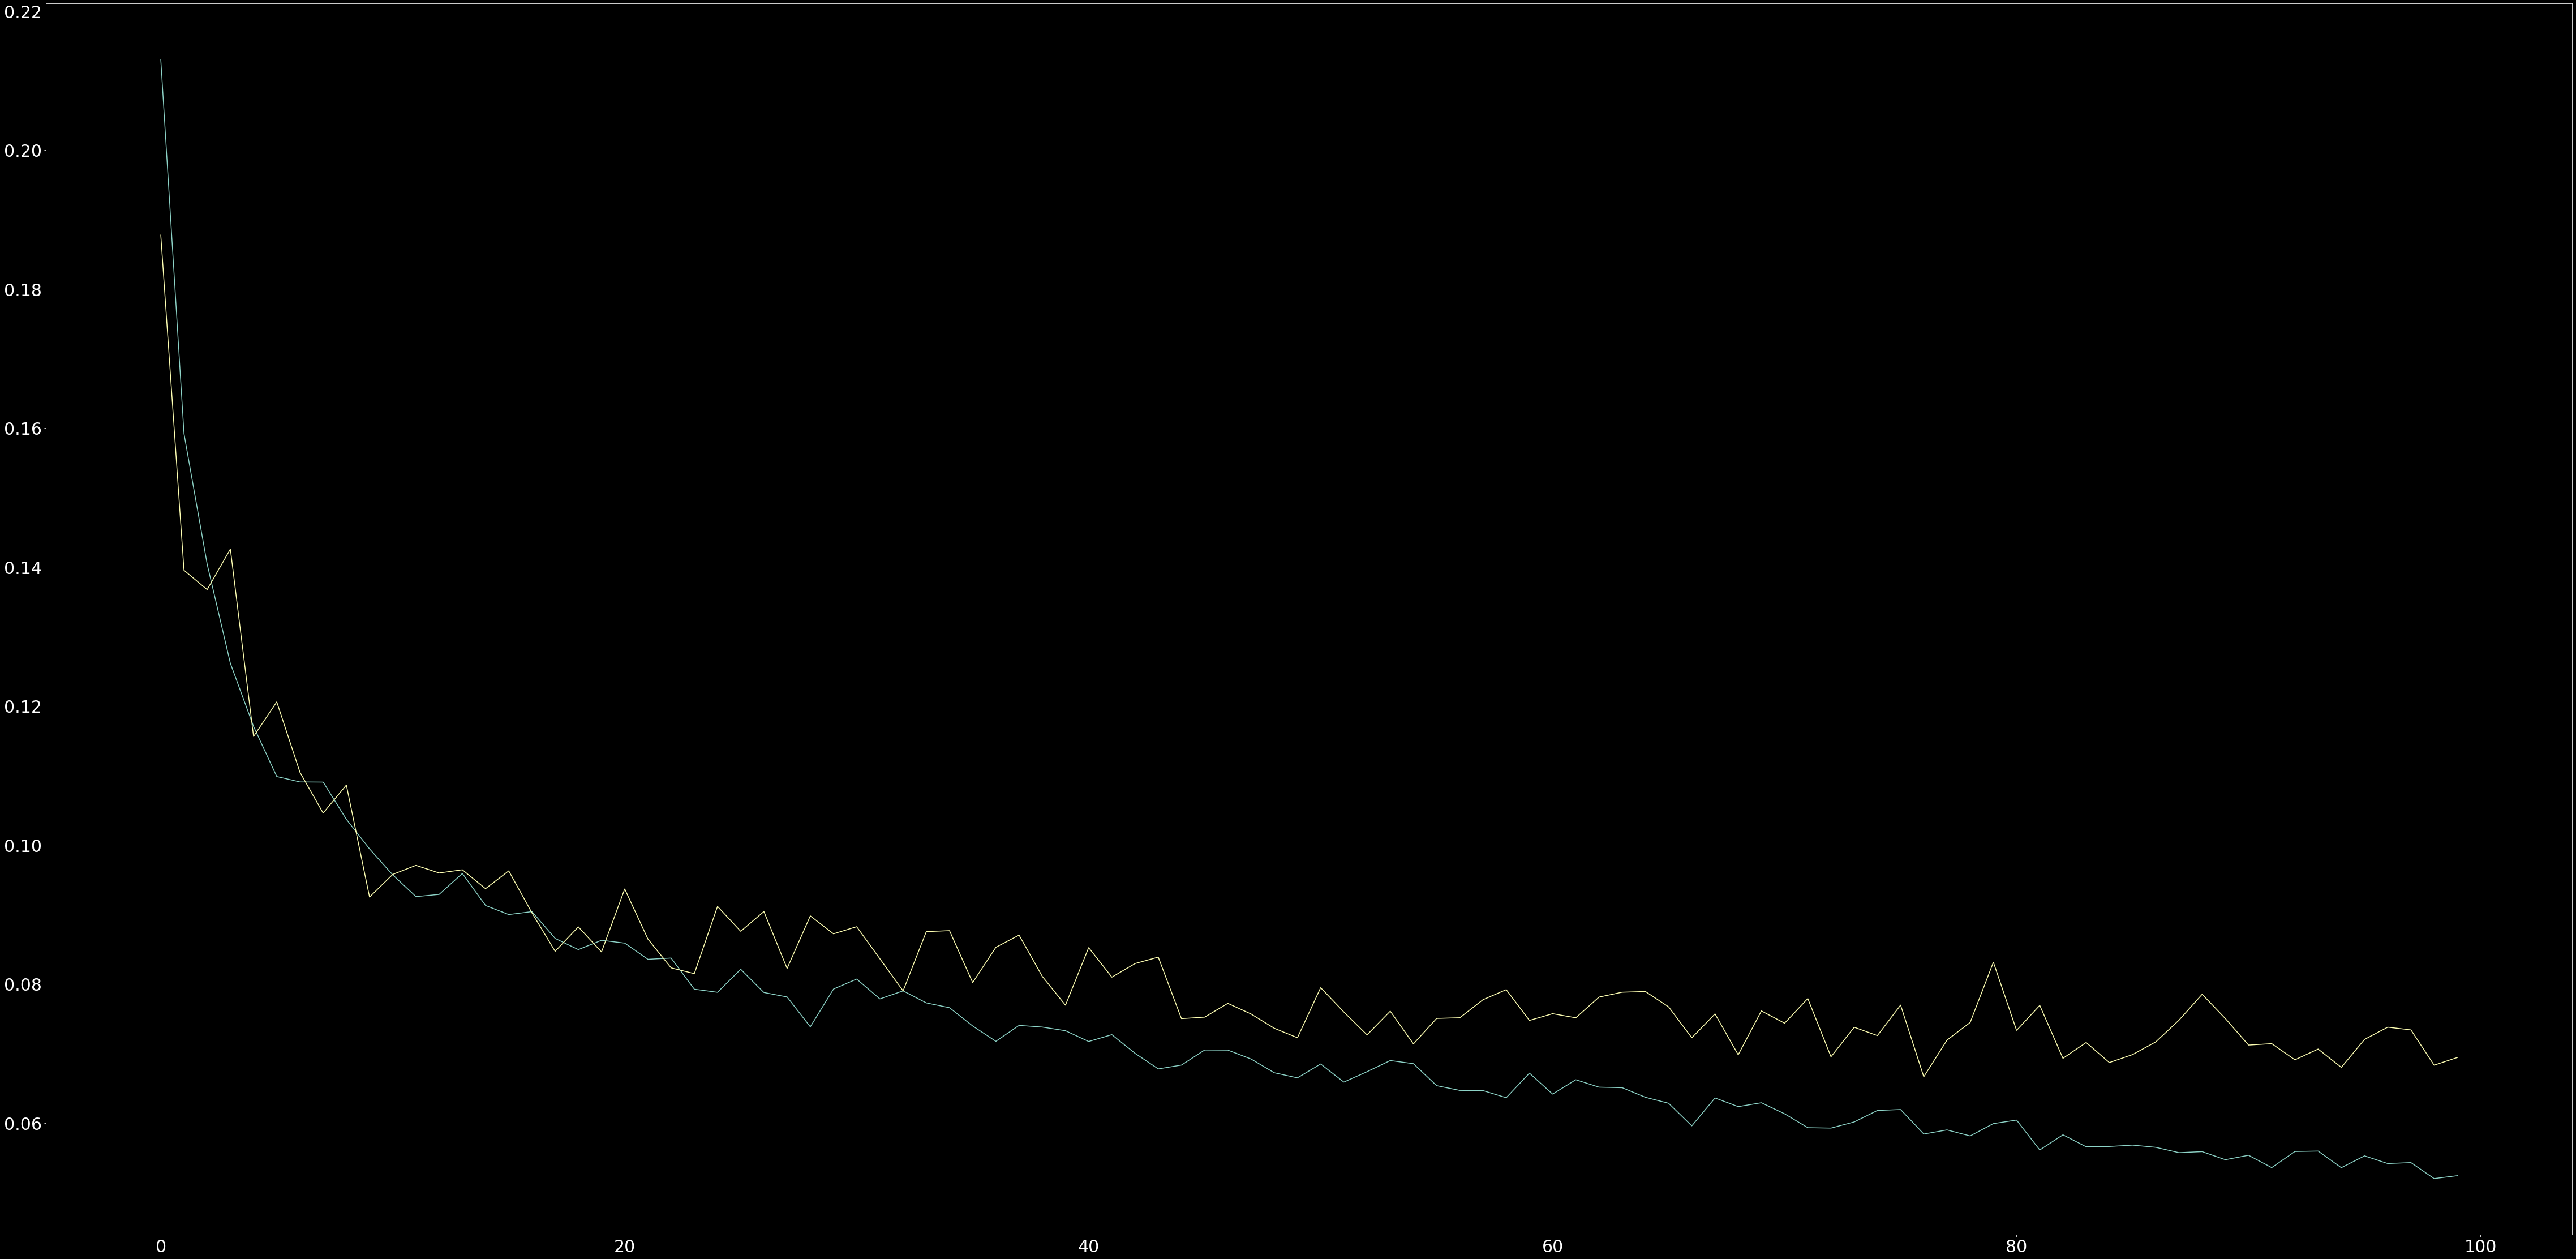

In [26]:
file_path = './train_results/2020-09-28-07-25-14/loss.npy'
plt.style.use("dark_background")

stats = numpy.load(file_path, allow_pickle=True).item()

epochs = stats['epoch']
batch_size = stats['batch_size']
training_loss_list = numpy.array(stats['training_loss_list'])
validation_loss_list = numpy.array(stats['validation_loss_list'])
epochs_list = numpy.array(range(epochs))

fig, ax = plt.subplots(1, 1, figsize=(80,40))

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(30)

ax.plot(epochs_list, training_loss_list)
ax.plot(epochs_list, validation_loss_list)

plt.show()

Test model:

In [ ]:
dataset = DeepSignatureDataset(dir_path=dataset_dir_path)
dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(numpy.floor(validation_split * dataset_size))

if shuffle_dataset is True:
    numpy.random.seed(random_seed)
    numpy.random.shuffle(indices)

train_indices, validation_indices = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_indices)
validation_sampler = SubsetRandomSampler(validation_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)
validation_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=validation_sampler)

plt.style.use("dark_background")
display(HTML('<h1>Curvature plot of random samples:</h1>'))
for i, data in enumerate(validation_loader, 0):

    if i == 1:
        break

    display(HTML(f'<h2>Batch #{i}:</h2>'))
    for sample_index in range(batch_size):

        fig, ax = plt.subplots(1, 2, figsize=(80,40))

        label = data['labels'][sample_index]

        if label == 1:
            sample_type = 'Positive'
        else:
            sample_type = 'Negative'

        display(HTML(f'<h3>{sample_type} sample #{sample_index}:</h3>'))

        curve1 = data['curves'][0][sample_index][0]
        curve2 = data['curves'][1][sample_index][0]
        
        x1 = curve1[:,0].cpu().numpy()
        y1 = curve1[:,1].cpu().numpy()
        x2 = curve2[:,0].cpu().numpy()
        y2 = curve2[:,1].cpu().numpy()

        ax[0].axis('equal')
        ax[1].axis('equal')

        ax[0].scatter(x=x1, y=y1, s=10)
        ax[1].scatter(x=x2, y=y2, s=10)

        for label in (ax[0].get_xticklabels() + ax[0].get_yticklabels()):
            label.set_fontsize(30)

        for label in (ax[1].get_xticklabels() + ax[1].get_yticklabels()):
            label.set_fontsize(30)
        
        plt.show()